In [89]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay


In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.count()

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64

In [7]:
df = df.drop(columns=['deck'], axis= 1)

In [15]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alone']
target = 'survived'

X = df[features]
y = df[target]

In [20]:
y.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state= 42, test_size= 0.2, stratify= y)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [44]:
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_features = X_train.select_dtypes(include = ['object', 'category']).columns.tolist()

<h3>Define seperate preprocessing pipelines for both types</h3>

In [45]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy= 'median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy= 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))
])

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer,numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [47]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state= 42))
])

In [48]:
param_grid = {
    'classifier__n_estimators' : [50,100],
    'classifier__max_depth' : [None, 10 ,20],
    'classifier__min_samples_split': [2,5]
    
}

In [49]:
cv = StratifiedKFold(n_splits = 5, shuffle = True)

In [50]:
model = GridSearchCV(estimator= pipeline,
                     param_grid=param_grid,
                     cv=cv,
                    scoring= 'accuracy',
                    verbose= 2)
model.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'class',
                                                                          'who'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

In [55]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.84      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



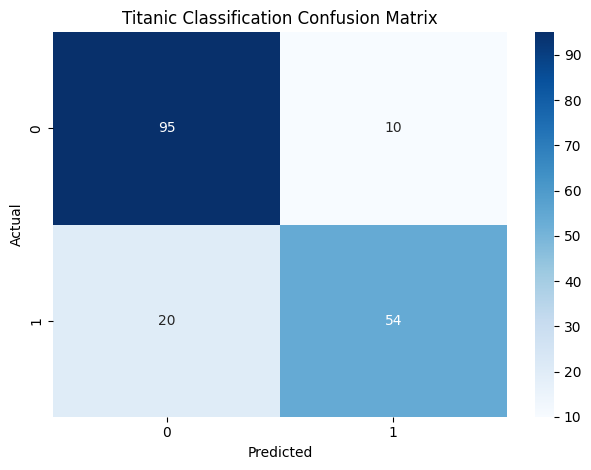

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot = True, cmap= 'Blues',fmt= "d"   )

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

In [64]:
model.best_estimator_['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)

array(['sex_female', 'sex_male', 'class_First', 'class_Second',
       'class_Third', 'who_child', 'who_man', 'who_woman'], dtype=object)

In [70]:
feature_importances = model.best_estimator_['classifier'].feature_importances_

# Combine the numerical and one-hot encoded categorical feature names
feature_names = numeric_features + list(model.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

In [72]:
feature_importances


array([0.05183635, 0.15209963, 0.05398619, 0.03451214, 0.19320364,
       0.09413026, 0.16260985, 0.01811251, 0.01962656, 0.055148  ,
       0.01489179, 0.09599226, 0.05385083])

In [73]:
importance_df = pd.DataFrame({'Feature':feature_names,
                             'Importance':feature_importances
                             }).sort_values(by = 'Importance',ascending= False)

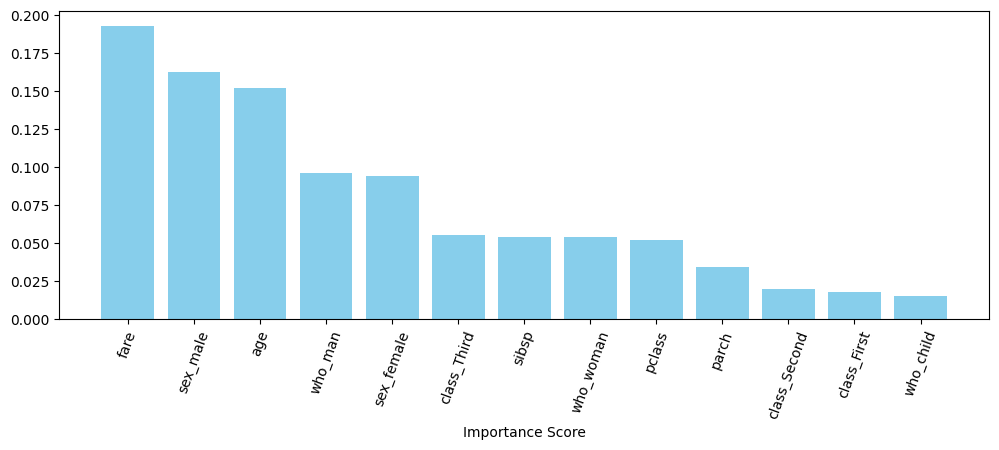

In [82]:
plt.figure(figsize= (12,4))
plt.bar(importance_df['Feature'], importance_df['Importance'], color = 'skyblue',)
# plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.xticks(rotation = 70)
plt.show()

In [88]:
test_score = model.score(X_test, y_test)
print(f"\nTest set accuracy: {test_score:.2%}")


Test set accuracy: 83.24%


<h3>Try another model</h3>

In [97]:
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('classifier' , LogisticRegression(random_state= 42))
])


In [101]:
param_grid2 = {
    'classifier__solver' : ['liblinear'],
    'classifier__penalty' : ['l1','l2'],
    'classifier__class_weight' :[None, 'balanced']
}

In [102]:
model2 =  GridSearchCV(estimator = pipeline2,
                       cv = cv, 
                       param_grid = param_grid2,
                       scoring = 'accuracy',
                       verbose = 2
                  )

In [103]:
model2.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.0s
[CV] END classifier__class_weight=No

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['pclass',
                                                                          'age',
                                                                          'sibsp',
                                                                          'parch',
                                                                          'fare']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'class',
                                                                          'who'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy', verbose=2)

<h3>Display the classification report for the new model and compare the result to your previous model</h3>

In [106]:
model2_pred = model2.predict(X_test)
print(classification_report(y_test,model2_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



<h3>Display the confusion matrix for the new model and compare the results to your previous model.</h3>

In [107]:
conf_matrix_model2 = confusion_matrix(y_test, model2_pred)


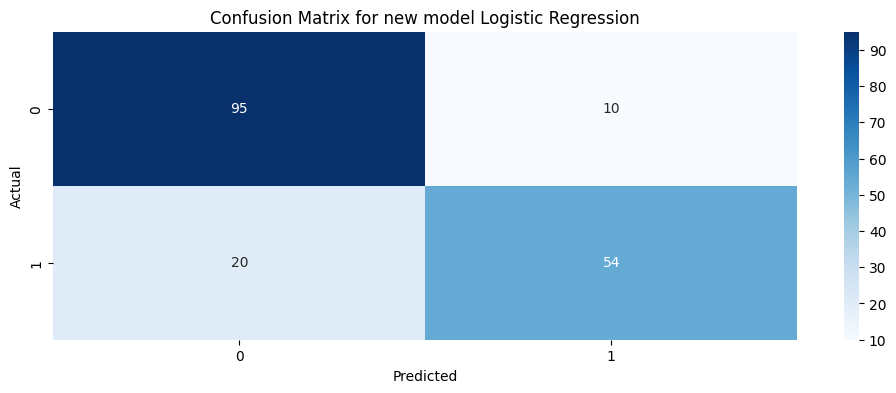

In [111]:
plt.figure(figsize=(12,4))
sns.heatmap(conf_matrix, annot = True,
           cmap= 'Blues', fmt  = 'd')

plt.xlabel('Predicted')
plt.ylabel("Actual")
plt.title("Confusion Matrix for new model Logistic Regression")
plt.show()

<h3>Extract the logistic regression feature coefficient and plot their magnitude in a bar chart</h3>

<h5>Feature Importance and feature names</h5>

In [141]:
feature_names2 = numeric_features+ list(model2.best_estimator_['preprocessor']
                                       .named_transformers_['cat']
                                       .named_steps['onehot']
                                       .get_feature_names_out(categorical_features))
feature_importance2 = model2.best_estimator_['classifier'].coef_[0]


In [146]:
importance_df2 = pd.DataFrame({
    'Features': feature_names,
    'Importance':np.abs(feature_importance2)
}).sort_values(by="Importance", ascending= False)

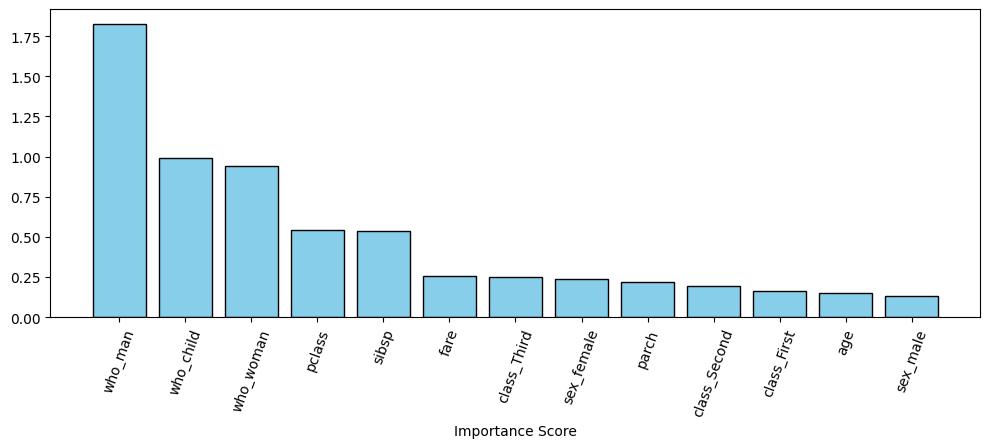

In [147]:
plt.figure(figsize=(12,4))
plt.bar(importance_df2['Features'], importance_df2['Importance'],color = "skyblue", edgecolor = 'k')
plt.xlabel("Importance Score")
plt.xticks(rotation = 70)
plt.show()

In [140]:
testScore = model2.best_estimator_.score(X_test,y_test)
print(f"\nTest set accuracy: {testScore:.2%}")


Test set accuracy: 81.01%
